# Tests for Plotting Tools

Author: Bill Tubbs

In [1]:
import control
control.__version__

'0.9.0'

In [2]:
from control import tf, c2d, rlocus, sisotool
#from control import pzmap, bode, nyquist, nichols
from control.grid import sgrid, zgrid
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
plot_dir = 'temp_plots'
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)

# Helper function for saving figures
def savefig(label, fname='{}_fig{}.pdf'):
    fig_n = plt.gcf().number
    plt.savefig(os.path.join(plot_dir, fname.format(label, fig_n)))


## Test z-plane and s-plane grid functions

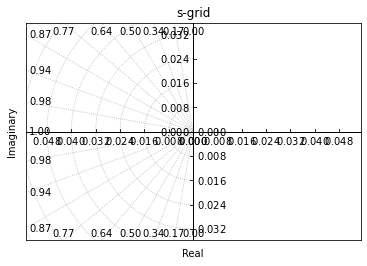

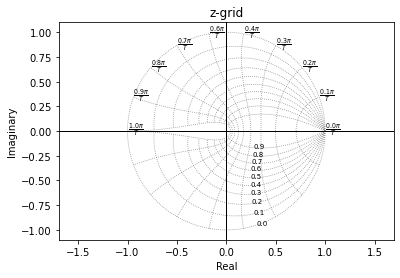

In [4]:
# First test zgrid and sgrid on their own
plt.figure()
sgrid()
plt.title('s-grid')
savefig('grids1')

plt.figure()
zgrid()
plt.title('z-grid')
savefig('grids1')

plt.show()

Note about matplotlib's subplot command from the documentation:
> Creating a new Axes will delete any pre-existing Axes that overlaps with it beyond sharing a boundary:

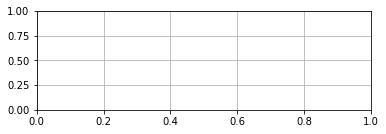

In [16]:
# plot a line, implicitly creating a subplot(111)
plt.plot([1, 2, 3])
# now create a subplot which represents the top plot of a grid
# with 2 rows and 1 column. Since this subplot will overlap the
# first, the plot (and its axes) previously created, will be removed
plt.subplot(211)
plt.grid()

### Radial plot

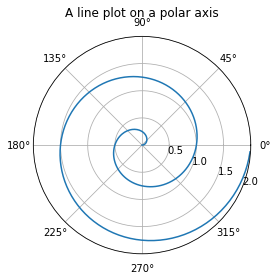

In [50]:
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

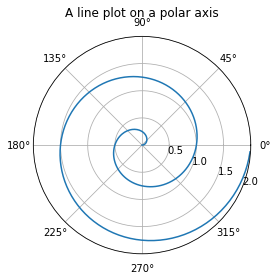

In [51]:
# Can also be done using subplot (which is a wrapper of Figure.add_subplot)

r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.set_title("A line plot on a polar axis", va='bottom')

plt.show()

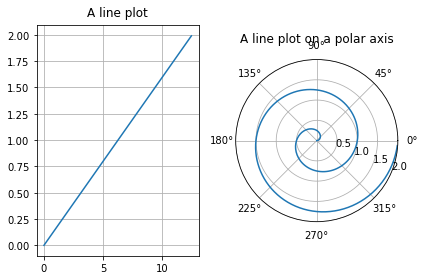

In [59]:
# Two different axes types in one figure

r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.plot(theta, r)
ax1.grid(True)
ax1.set_title("A line plot", va='bottom')

ax2 = fig.add_subplot(122, polar=True)
ax2.plot(theta, r)
ax2.set_rmax(2)
ax2.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax2.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax2.grid(True)
ax2.set_title("A line plot on a polar axis", va='bottom')

plt.tight_layout()
plt.show()

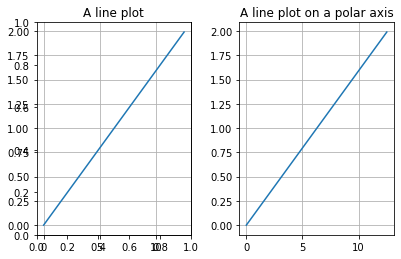

In [84]:
# What if the subplots are already made and you want to change 
# one to a radial plot?

r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, axes = plt.subplots(1, 2)

ax = axes[0]
ax = fig.add_subplot(121)
ax.plot(theta, r)
ax.grid()
ax.set_title("A line plot")

ax = axes[1]
ax.plot(theta, r)
#ax.set_rmax(2)
#ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.set_title("A line plot on a polar axis")

plt.tight_layout()
plt.show()

In [85]:
axes[1]

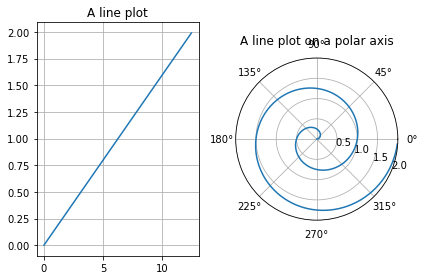

In [90]:
# What if the subplots are already made and you want to change 
# one to a radial plot?

# Solution: delete it axis after creating it and replace it

fig, axes = plt.subplots(1, 2)

ax = axes[0]
ax.plot(theta, r)
ax.grid()
ax.set_title("A line plot")

# Replace existing axis
fig.delaxes(axes[1])  # Or: axes[1].remove()
axes[1] = fig.add_subplot(122, polar=True)

ax = axes[1]
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.set_title("A line plot on a polar axis")

plt.tight_layout()
plt.show()

In [91]:
axes[1]  # Still exists

### How does Pandas change the axis if it needs to?

In [122]:
import pandas as pd

np.random.seed()
data = np.random.random(6)
index = [chr(c) for c in range(65, 71)]
s = pd.Series(data, index=index, name='Data')
s

A    0.822411
B    0.357166
C    0.762591
D    0.444889
E    0.101358
F    0.614232
Name: Data, dtype: float64

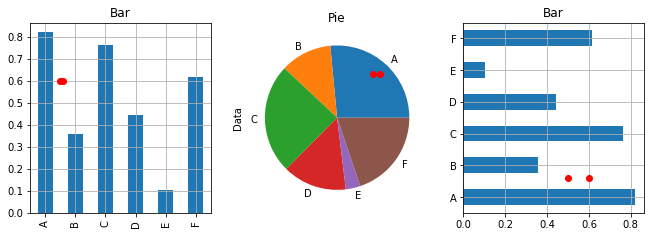

In [142]:
fig, axes = plt.subplots(1, 3, figsize=(11, 3.5))

ax = axes[0]
s.plot.bar(ax=ax)
ax.grid()
ax.set_title('Bar')

ax = axes[1]
s.plot.pie(ax=ax)
ax.set_title('Pie')

ax = axes[2]
s.plot.barh(ax=ax)
ax.grid()
ax.set_title('Bar')

axes[0].plot([0.5, 0.6], [0.6, 0.6], 'ro')
axes[1].plot([0.5, 0.6], [0.6, 0.6], 'ro')
axes[2].plot([0.5, 0.6], [0.6, 0.6], 'ro')

plt.show()

In [125]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc011aeb0f0>,
      dtype=object)

In [135]:
axes[1].properties()

{'adjustable': 'box',
 'agg_filter': None,
 'alpha': None,
 'anchor': 'C',
 'animated': False,
 'aspect': 'equal',
 'autoscale_on': False,
 'autoscalex_on': False,
 'autoscaley_on': False,
 'axes_locator': None,
 'axisbelow': 'line',
 'children': [<matplotlib.patches.Wedge at 0x7fc012096828>,
  Text(0.7401410978750449, 0.8137512858584762, 'A'),
  Text(-0.48471381643240324, 0.9874474751395816, 'B'),
  Text(-1.099794343355857, -0.02126975134925787, 'C'),
  Text(-0.3552215359972431, -1.0410656369142914, 'D'),
  Text(0.24464636007742913, -1.072449606508793, 'E'),
  Text(0.894023095054139, -0.6408765134640355, 'F'),
  Text(0.5, 1.0, 'Pie'),
  Text(0.0, 1.0, ''),
  Text(1.0, 1.0, ''),
 'clip_box': None,
 'clip_on': True,
 'clip_path': None,
 'contains': None,
 'data_ratio': 1.0,
 'default_bbox_extra_artists': [<matplotlib.patches.Wedge at 0x7fc012096828>,
  Text(0.7401410978750449, 0.8137512858584762, 'A'),
  Text(-0.48471381643240324, 0.9874474751395816, 'B'),
  Text(-1.099794343355857, -0.

In [5]:
# Adding grids to an existing figure
fig = plt.figure(figsize=(4.5, 4))
sgrid(fig=fig)
plt.title('s-grid')
savefig('grids2')

fig = plt.figure(figsize=(4.5, 4))
zgrid(fig=fig)
plt.title('z-grid')
savefig('grids2')

fig, ax = plt.subplots(figsize=(4.5, 4))
zgrid(ax=ax)  # only works with zgrid
plt.title('z-grid #2')
savefig('grids2')

plt.show()

TypeError: sgrid() got an unexpected keyword argument 'fig'

<Figure size 324x288 with 0 Axes>

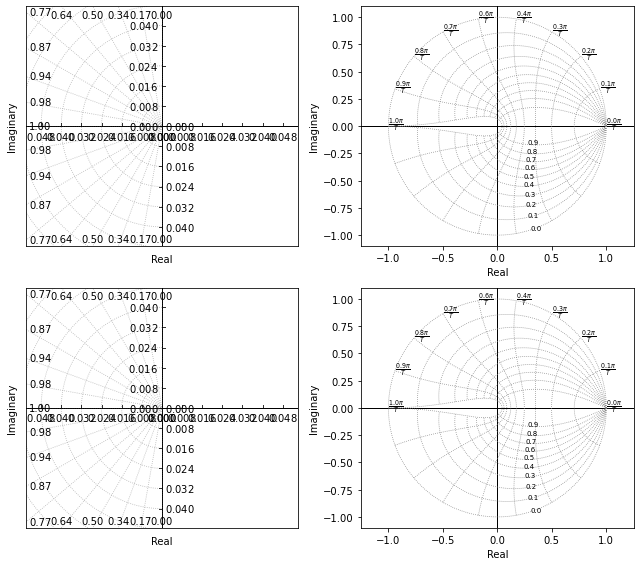

In [5]:
# Create figure with subplots
fig = plt.figure(figsize=(9,8))
sgrid(position=(2, 2, 1))
ax2 = fig.add_subplot(2, 2, 2)
zgrid(ax=ax2)  # alternative for zgrids
#zgrid(position=(2, 2, 2))
sgrid(position=(2, 2, 3))
ax4 = fig.add_subplot(2, 2, 4)
zgrid(ax=ax4)  # alternative for zgrids
plt.tight_layout()
savefig('grids_subplots')

plt.show()

## Test `rlocus` function

In [6]:
# Define test systems
s = tf('s')
G1 = 2*(s+1)/(s*(s-2))
G2 = tf(1, [1, 8, 30, 56, 65])
Gz1 = c2d(G1, 0.2)
Gz2 = c2d(G2, 0.2)

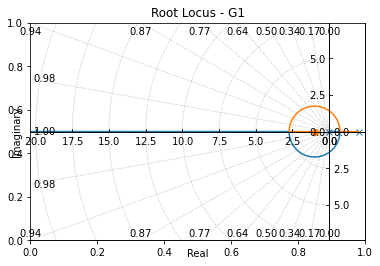

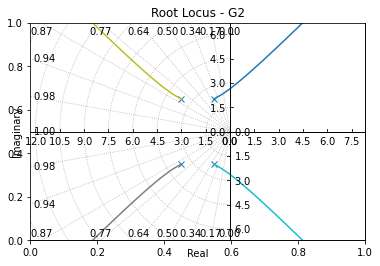

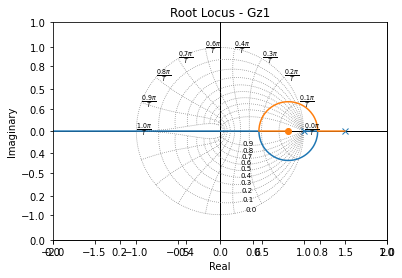

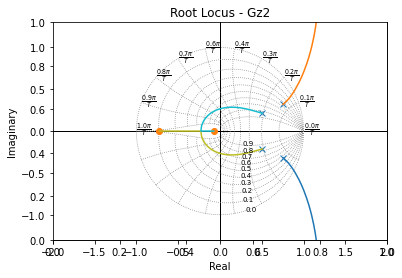

In [7]:
# Single plots
plt.figure()
rlocus(G1, title='Root Locus - G1')
savefig('rlocus1')

plt.figure()
rlocus(G2, title='Root Locus - G2')
savefig('rlocus1')

plt.figure()
rlocus(Gz1, title='Root Locus - Gz1')
savefig('rlocus1')

plt.figure()
rlocus(Gz2, title='Root Locus - Gz2')
savefig('rlocus1')

plt.show()

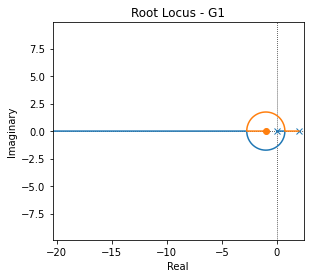

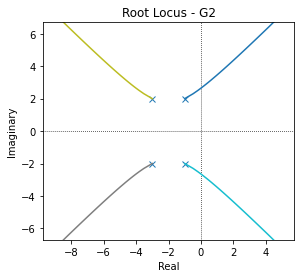

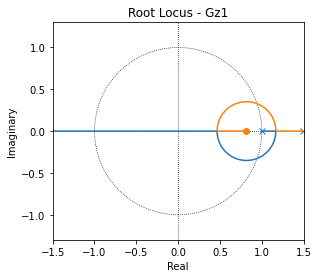

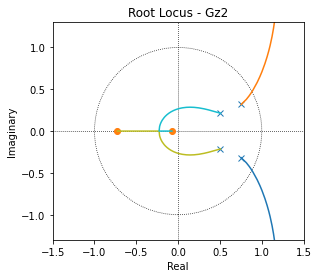

In [8]:
# Single default plots - without grid
plt.figure(figsize=(4.5, 4))
rlocus(G1, grid=False, title='Root Locus - G1')
savefig('rlocus2')

plt.figure(figsize=(4.5, 4))
rlocus(G2, grid=False, title='Root Locus - G2')
savefig('rlocus2')

plt.figure(figsize=(4.5, 4))
rlocus(Gz1, grid=False, title='Root Locus - Gz1')
savefig('rlocus2')

plt.figure(figsize=(4.5, 4))
rlocus(Gz2, grid=False, title='Root Locus - Gz2')
savefig('rlocus2')
plt.show()

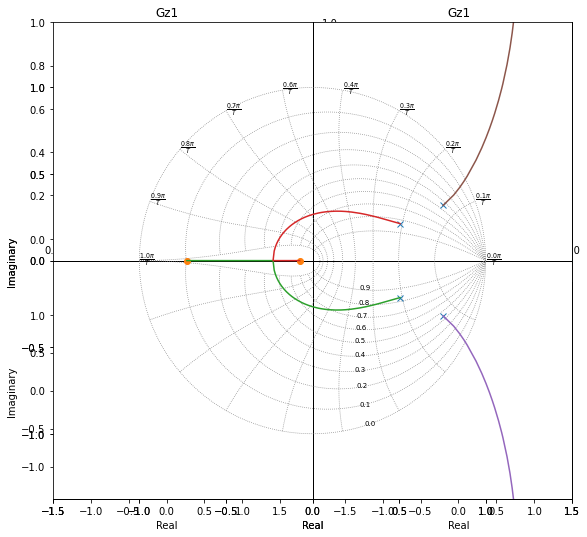

In [9]:
# Subplots - discrete time
fig, axes = plt.subplots(2, 2, figsize=(9,8))
rlocus(Gz1, ax=axes[0, 0], title='Gz1')
rlocus(Gz2, ax=axes[0, 1], title='Gz1')
rlocus(Gz1, ax=axes[1, 0], grid=False, title='Gz1 - no grid')
rlocus(Gz2, ax=axes[1, 1], grid=False, title='Gz1 - no grid')
plt.tight_layout()
savefig('rlocus_subplots1')
plt.show()

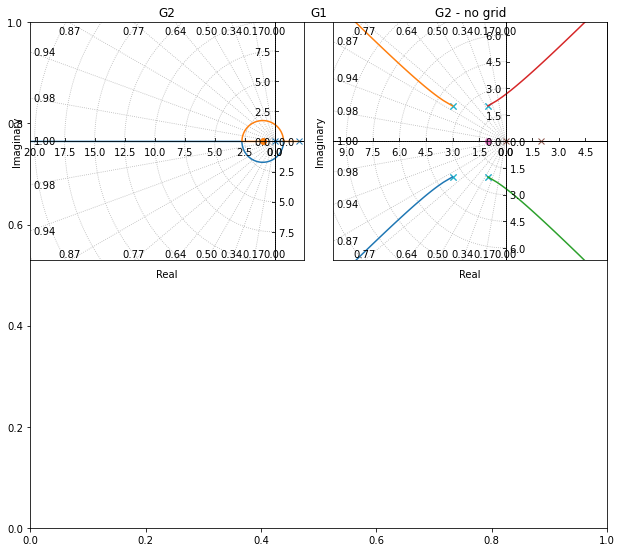

In [10]:
# Subplots - sontinuous time, done differently due to sgrid
fig = plt.figure(figsize=(9,8))
rlocus(G1, position=(2, 2, 1), title='G1')
rlocus(G2, position=(2, 2, 2), title='G2')
rlocus(G1, position=(2, 2, 3), grid=False, title='G1 - no grid')
rlocus(G2, position=(2, 2, 4), grid=False, title='G2 - no grid')
plt.tight_layout()
savefig('rlocus_subplots1')
plt.show()

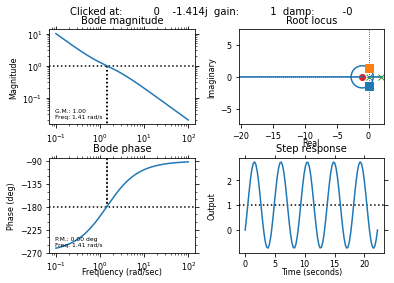

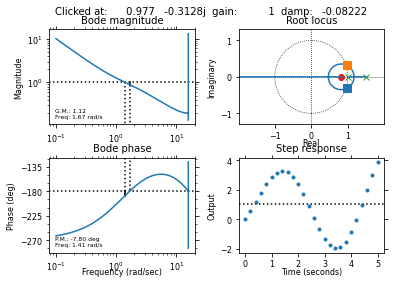

In [11]:
# Check sisotool works (includes rlocus plot)
sisotool(G1)
savefig('sisotool')
plt.show()

sisotool(Gz1)
savefig('sisotool')
plt.show()